# Performance of semantle solvers and similarity models

Compare solvers with a sequence of guesses from people

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cohort_bayes_solver import CohortBayesSolver
from gradient_solver import GradientSolver
from gradient_solver_2 import GradientSolver2
from semantle_simulator import SemantleSimulator
import vocabulary as voc
import similarity_model as sm
import performance as perf

In [7]:
import importlib
importlib.reload(voc)

<module 'vocabulary' from '/Users/dcolls/workspace/semantic/vocabulary.py'>

## Simulator for semantle

In [2]:
sem_sim = SemantleSimulator()

In [3]:
sample_targets = ['terrible', 'dear', 'habitat', 'carrot', 'gather', 'amendment', 'worried', 'significant']
sem_sim.target = sample_targets[3]

## Agent similarity model

In [8]:
base_vocabulary_ews = voc.VocabularyEWS()
voc.add_missing_words(base_vocabulary_ews, sample_targets)

base_vocabulary_uf = voc.VocabularyUF()
voc.add_missing_words(base_vocabulary_uf, sample_targets)

similarity_ews = sm.SimilarityModelW2V(base_vocabulary_ews, sem_sim.wv)
similarity_uf = sm.SimilarityModelW2V(base_vocabulary_uf, sem_sim.wv)

## Evaluate performance

In [11]:
ctor = lambda: CohortBayesSolver(similarity_ews, precision=0.1, recall=0.5)
trial_ews = perf.run_trial(ctor, sem_sim, n=10, target_pool=sample_targets)

ctor = lambda: CohortBayesSolver(similarity_uf, precision=0.1, recall=0.5)
trial_uf = perf.run_trial(ctor, sem_sim, n=10, target_pool=sample_targets)

In [12]:
np.mean(trial_ews), np.mean(trial_uf)

(34.6, 40.1)

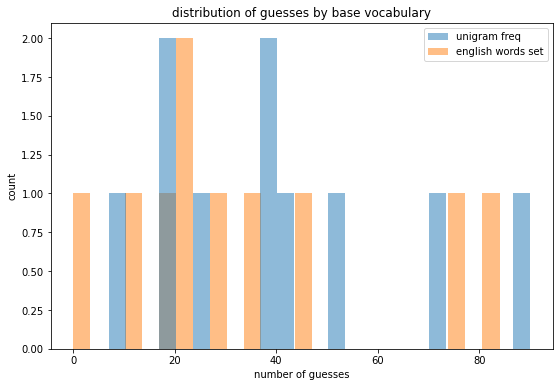

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.hist(trial_uf, alpha=0.5, bins=25, zorder=100)
plt.hist(trial_ews, alpha=0.5, bins=25)
plt.legend(['unigram freq', 'english words set'])
plt.title('distribution of guesses by base vocabulary')
plt.xlabel('number of guesses')
plt.ylabel('count')
plt.show()

In [14]:
from scipy.stats import ks_2samp

ks_2samp(trial_ews, trial_uf)

KstestResult(statistic=0.3, pvalue=0.7869297884777761)

In [18]:
ctor = lambda: GradientSolver(similarity_uf)
trial_1 = perf.run_trial(ctor, sem_sim, n=10, target_pool=sample_targets)

In [21]:
ctor = lambda: GradientSolver2(similarity_uf)
trial_2 = perf.run_trial(ctor, sem_sim, n=10, target_pool=sample_targets)

In [22]:
np.mean(trial_1), np.mean(trial_2)

(148.3, 87.5)

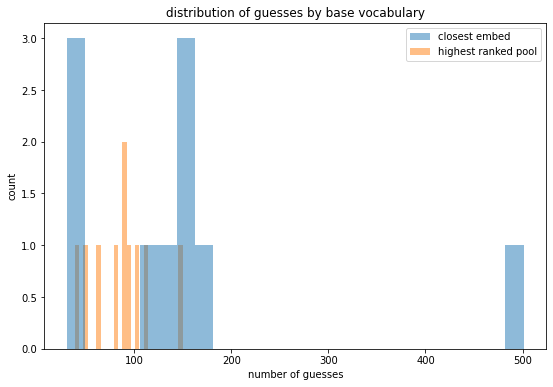

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.hist(trial_1, alpha=0.5, bins=25, zorder=100)
plt.hist(trial_2, alpha=0.5, bins=25)
plt.legend(['closest embed', 'highest ranked pool'])
plt.title('distribution of guesses by base vocabulary')
plt.xlabel('number of guesses')
plt.ylabel('count')
plt.show()

In [24]:
ks_2samp(trial_1, trial_2)

KstestResult(statistic=0.5, pvalue=0.16782134274394334)

## Compare solvers

In [26]:
perf.compare(lambda: CohortBayesSolver(similarity_ews, precision=0.1, recall=0.5),
             lambda: CohortBayesSolver(similarity_uf, precision=0.1, recall=0.5),
             sem_sim,
             n=10)

((39.6, 23.745315327449326), (31.9, 18.09668477926275))

## Evaluate sensitivity

In [28]:
uctor = lambda x: CohortBayesSolver(similarity_uf, precision=x, recall=0.5)
psweep = [0.05, 0.1, 0.2]
sweep_results = perf.run_sweep(uctor, psweep, sem_sim, target_pool=sample_targets)
sweep_results

[[19, 25, 40, 35, 40, 20, 8, 17, 24, 11],
 [68, 20, 59, 54, 44, 61, 83, 17, 21, 18],
 [118, 82, 51, 275, 195, 35, 98, 104, 141, 72]]

In [29]:
perf.sweep_norm(sweep_results)

[(23.9, 44.5, 117.1),
 (10.718675291284834, 22.84403642091301, 68.17983572875488)]